# Изучение YOLO - Быстре методы обнаружения объектов.
<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1d--jyNUIyCfu7kqCzS_axSZTuJZFUID8#scrollTo=EFAO3VOrllIY) -->


Современные модели быстрого обнаружения объектов `You Look Only Once` (`YOLO`) представляют собой одноэтапные оптимизированные подходы решения [набора связанных задач](https://docs.ultralytics.com/tasks/). Среди таких задач следует выделить такие, как:
* [Обнаружение отдельных объектов](https://docs.ultralytics.com/tasks/detect/) (`object detection`).
* [Сегментация объектов](https://docs.ultralytics.com/tasks/segment/) (`instance segmentation`).
* [Обнаружерие ключевых точек](https://docs.ultralytics.com/tasks/pose/) (`key point detection`/`pose Estimation`).
* [Обнаружение и ориентация объектов](https://docs.ultralytics.com/tasks/obb/) (`oriented object detection`/ `oriented bounding boxes`).
* [Отслеживание объектов на видео-последовательностях](https://docs.ultralytics.com/modes/track/) (`object tracking`/`Multi-object tracking`).
* [Классификация изображений (объектов на изображениях)](https://docs.ultralytics.com/tasks/classify/) (`image classification`). 

<br><img width="600" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">

Кроме указанных сегодня могут быть решены и [ряд более специфических задач](https://docs.ultralytics.com/solutions/#solutions), однако построенных на уже описанных выше. Также [тут](https://github.com/ultralytics/ultralytics/tree/main/examples) можно найти ряд официальных примеров работы с моделями `YOLO`

> Также важно отметить, что каждый тип задач потребует своего [формата аннотировния данных (их разметки)](https://docs.ultralytics.com/guides/data-collection-and-annotation/#types-of-data-annotation).

Каждая из этих задач имеет свои особенности применения, но все они базируются сегодня на едином подходе `YOLO`. Сегодня среди архитектур YOLO следует выделить такие, как:
* [`YOLO 5`](https://docs.ultralytics.com/models/yolov5/) - переработка `YOLO 4` и наследия более ранних и более классических версий этой архитектуры.
* [`YOLO 8`](https://docs.ultralytics.com/models/yolov8/) - современная мультизадачная архитектура безанхорного обнаружения объектов.
* [`YOLO 10`](https://docs.ultralytics.com/models/yolov10/) - Одна из последних переработок подхода `YOLO`.

> На сегодня наиболее популярной моделью является [`YOLO 8`](https://yolov8.org/). Поэтому мы сосредоточимся [на ее изучении](https://blog.roboflow.com/whats-new-in-yolov8/). Однако, отметим, что работа с остальными моделями во многом похожа на эту. Кроме того, на сегодня наиболее "свежей" моделью является версия [`YOLO 8.2`](https://github.com/ultralytics/assets/releases/tag/v8.2.0).

Все реализации указанных подходов относятся к разработкам компании [`ultralytics`](https://docs.ultralytics.com/). Приемущества этих архитектур в простоте как исследовательской работы с ними, так и их реализации в конечных программных продуктах. Архитектуры имеют два интерфейса:
* [`CLI`](https://docs.ultralytics.com/usage/cli/) - интерфейс команадной строки. Этот путь будет наиболее удобным при реализации архитектур в конечных продуктах, однако не так интуитивно понятен при экспериментах с моделью.
* [`API Python`](https://docs.ultralytics.com/usage/python/) - это более стандартный путь работы с моделями `ultralytics` в рамках библиотеки `Python`.

Мы воспользуемся вторым вариантом. Отметим, что прекрасный пример работы с CLI можно найти, например [тут](https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb) и [тут](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb).

<img src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png" width="700px">

Важно также отметить, что `ultralytics` не единственный фреймворк работы с моделями для сложных задач компьюетрного зрения. Среди альтернатив следует выделить следующие:
* Возможности нативного [`PyTorch/torchvision`](https://pytorch.org/vision/main/models.html#object-detection), в том числе в области [многоэтапных моделей](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) и [одноэтапных моделей](https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection).
* [`Detectron2`](https://detectron2.readthedocs.io/en/latest/) - фреймворк работы с многоэтапными моделями.
* [Экосистема `Open-MMLab`](https://github.com/open-mmlab) в том числе [`MMDetection`](https://mmdetection.readthedocs.io/en/latest/) и [`MMYOLO`](https://github.com/open-mmlab/mmyolo).
* [Экосистема `Hugging Face`](https://huggingface.co/docs/transformers/en/tasks/object_detection), в том числе модель на основе трансформеров [`YOLOS`](https://huggingface.co/docs/transformers/en/model_doc/yolos).

Однако, именно `YOLO` от `ultralytics` на сегодня можно назвать наибольшим кандатом на то, чтобы стать промышенным стандартом решения индустриальных задач компьютерного зрения.

Начнем с установки библиотеки [`ultralytics`](https://docs.ultralytics.com/quickstart/).

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

In [8]:
import matplotlib.pyplot as plt
import cv2

при проблемах с установкой `ultralytics` см. [тут](https://gist.github.com/yelled3/a5eaf3ca90011aaf7e7901c55680ff06)
<!-- import os
import os.path
import ssl
import stat
import subprocess
import sys

STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
             | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
             | stat.S_IROTH |                stat.S_IXOTH )


def main():
    openssl_dir, openssl_cafile = os.path.split(
        ssl.get_default_verify_paths().openssl_cafile)

    print(" -- pip install --upgrade certifi")
    subprocess.check_call([sys.executable,
        "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])

    import certifi

    # change working directory to the default SSL directory
    os.chdir(openssl_dir)
    relpath_to_certifi_cafile = os.path.relpath(certifi.where())
    print(" -- removing any existing file or link")
    try:
        os.remove(openssl_cafile)
    except FileNotFoundError:
        pass
    print(" -- creating symlink to certifi certificate bundle")
    os.symlink(relpath_to_certifi_cafile, openssl_cafile)
    print(" -- setting permissions")
    os.chmod(openssl_cafile, STAT_0o775)
    print(" -- update complete")

if __name__ == '__main__':
    main() -->

In [9]:
# !pip3 install -U ultralytics --user

In [10]:
import ultralytics

Перед началом работы с `ultralytics` следует также произвести ее настройку. В том числе выключить логирование, которое в данном примере не понадобится.
Настройки можно получить в виде словаря [`settings`](https://docs.ultralytics.com/quickstart/#ultralytics-settings). На самом деле в предусмотены настройки различных типичных этапов  работы с моделями. Все настройки [управляются своими методами](https://docs.ultralytics.com/usage/cfg/).

> Отметим, что в целом логирование - это крайне важный инструмент и в реальных эксперементах оно рекомендуется. В `ultralytics` предусмотрены несколько вариантов логирования на выбор. 


In [24]:
from ultralytics import settings
settings.update({"wandb": False, "tensorboard": False, "clearml":False, "mlflow":False, "neptune":False,'raytune':False, 'comet': False, 'dvc': False, 'hub': False })

In [25]:
print(settings)

{'settings_version': '0.0.4', 'datasets_dir': '/Users/mvronkin/datasets', 'weights_dir': '/Users/mvronkin/weights', 'runs_dir': '/Users/mvronkin/runs', 'uuid': '55725a0918fe4387f56ee9e6811c655df0d53221dc92f35af3e611a446d472a8', 'sync': True, 'api_key': '', 'openai_api_key': '', 'clearml': False, 'comet': False, 'dvc': False, 'hub': False, 'mlflow': False, 'neptune': False, 'raytune': False, 'tensorboard': False, 'wandb': False}


Также `ultralytics` предоставляют собственный интерфейс проверки вычислителей.

In [26]:
ultralytics.checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.12.2 torch-2.2.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 420.6/460.4 GB disk)


Теперь проведем тест модели. На самом деле сегодня `ultralytics` предлагает несколько [моделей](https://docs.ultralytics.com/models/). В том числе модели `YOLO 3 - 10`, `YOLO-NAS`, `RT-DETR`, `YOLO-World` и быстрые модели `SAM`.

Модели типа `YOLO` могут быть импортированы из `ultralytics` так, как это покзано ниже в примере. 

На самом деле часто каждая версия  `YOLO` это [семейство моделей разной размерности](https://docs.ultralytics.com/models/yolov8/#performance-metrics). В данном примере воспользуемся моделью `YOLOv8n` (`nano`). 

Модели можно загружать как с инициализацией весовых параметров, так и предобученные. Мы воспользуемся предобученной моделью. Чаще всего модели предобучаются на наборе данных [`COCO`](https://cocodataset.org/).

> Отметим, что загрузка модели без предобученных параметров может быть вызвана как `model = YOLO("yolov8n.yaml")`.

In [28]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

Некоторая информация о модели может быть получена так, как это показано ниже. 

In [29]:
model.info()

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

Теперь попробуем загрузку изображения в модель. Для этого вызовим метод `predict`. Отметим, что на самом деле с готовыми моделями YOLO можно работать и при помощи метода `__call__` (`model.predict()`$=$`model()`), но тут мы объявим метод прямо.

In [30]:
results = model.predict(["https://ultralytics.com/images/bus.jpg", 
                         "https://ultralytics.com/images/zidane.jpg"])


0: 640x640 4 persons, 1 bus, 472.6ms
1: 640x640 2 persons, 1 tie, 472.6ms
Speed: 6.6ms preprocess, 472.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Результат работы модели представляет собой список атребутов. Подрбоное описание атребуетов можно найти [тут](https://docs.ultralytics.com/modes/predict/#working-with-results). В том числе следующие атребуты:

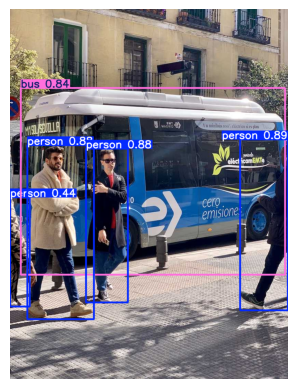

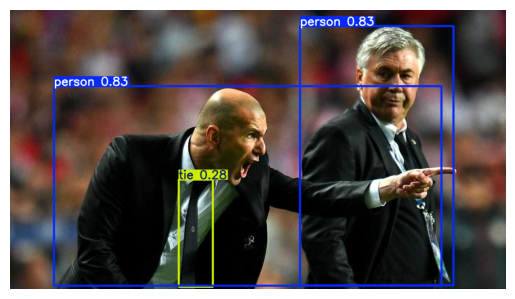

In [31]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.save(filename="result.jpg")  # save to disk
    plt.imshow(result.plot()[:,:,::-1]); plt.axis('off'); plt.show()

> Обратите внимание, что вывод изображение в формет `BGR`, поэтому мы перевернули порядок каналов для `plt`.

Анадлогично попробуем запуск 5 типов задач для выбранной модели.


In [32]:
img = "https://ultralytics.com/images/zidane.jpg"

model = YOLO("yolov8n.pt") 
results = model.predict(img,imgsz=640)
results[0].save(filename="result-od.jpg")

model = YOLO("yolov8n-seg.pt") 
results = model.predict(img,imgsz=640)
results[0].save(filename="result-seg.jpg")

model = YOLO("yolov8n-pose.pt") 
results = model.predict(img,imgsz=640)
results[0].save(filename="result-pose.jpg")

model = YOLO("yolov8n-obb.pt") 
results = model.predict(img,imgsz=640)
results[0].save(filename="result-obb.jpg")

model = YOLO("yolov8n-cls.pt") 
results = model.predict(img,imgsz=640)
results[0].save(filename="result-cls.jpg")


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/zidane.jpg: 384x640 2 persons, 1 tie, 465.4ms
Speed: 4.7ms preprocess, 465.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/zidane.jpg: 384x640 2 persons, 1 tie, 590.1ms
Speed: 24.1ms preprocess, 590.1ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/zidane.jpg: 384x640 2 persons, 385.6ms
Speed: 4.2ms preprocess, 385.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

Found https://ultralytics.com/images/zidane.jpg lo

'result-cls.jpg'

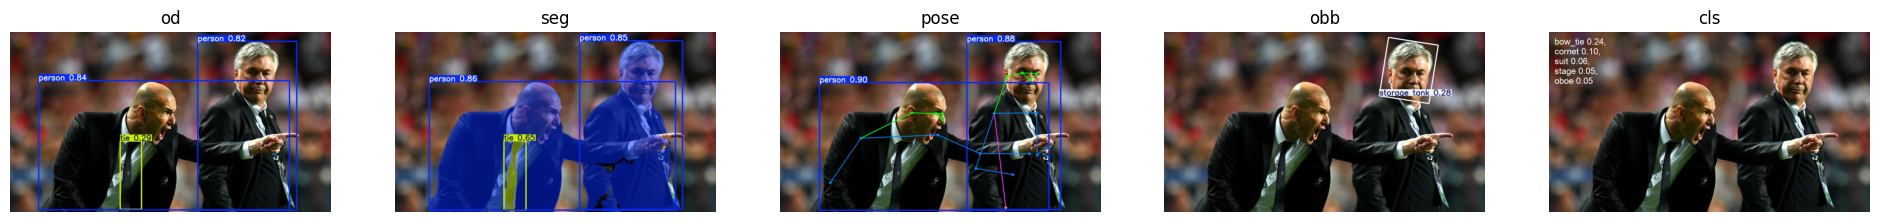

In [33]:
tasks = ['od','seg','pose','obb','cls']
fig, axs = plt.subplots(1,len(tasks), figsize=(24,18))
for ax, task in zip(axs,tasks):
    ax.imshow(cv2.imread('result-'+task+'.jpg')[:,:,::-1]); ax.set_axis_off(); ax.set_title(task);
plt.show()

Теперь попробуем обучить модель. Для теста работы сети (того, что модель вообще работает) можно загрузить стандартный мини набор данных [`COCO8`](https://docs.ultralytics.com/datasets/detect/coco8/), который является некоторым случайным батчем из исходного набора данных `COCO`. 

При работе с набором данных важно понимать структуру разметки файла. 
1. набор данных для `YOLO` описывается при помощи `yaml` файла. Этот файл является данными для модели. 
2. Файл должен иметь структуру, поисывающую путь к набору данных `path`, а также пути к необходимым частям данных: `train`, `val`, `test` (опционально). 
3. Файл должен содержать описание классов в виде списка (`names:`) или их число (`n_classes`).
4. Если набор данных необходимо скачать, то также указывается в виде атребута `download`.

Пример для `COCO8` можно найти [`тут`](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco8.yaml).

Запустим обучение на 8 эпохах.

> Отметим, что более полную инструкцию по настройке обучения можно найти [тут](https://docs.ultralytics.com/modes/train/#train-settings).

In [35]:
model = YOLO("yolov8n.pt")
results = model.train(data="coco8.yaml",imgsz=640, epochs=1, amp=False)

New https://pypi.org/project/ultralytics/8.3.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.63 🚀 Python-3.12.2 torch-2.2.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train39, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

train: Scanning /Users/mvronkin/datasets/coco8/labels/train.cache... 4 images, 0

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /Users/mvronkin/datasets/coco8/labels/val.cache... 4 images, 0 bac

Plotting labels to /Users/mvronkin/runs/detect/train39/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/mvronkin/runs/detect/train39
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.521      4.076      1.812         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.605       0.87      0.888      0.618

1 epochs completed in 0.007 hours.
Optimizer stripped from /Users/mvronkin/runs/detect/train39/weights/last.pt, 6.5MB
Optimizer stripped from /Users/mvronkin/runs/detect/train39/weights/best.pt, 6.5MB

Validating /Users/mvronkin/runs/detect/train39/weights/best.pt...
Ultralytics YOLOv8.2.63 🚀 Python-3.12.2 torch-2.2.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.604      0.872      0.888      0.618
                person          3         10      0.661        0.5      0.518      0.288
                   dog          1          1      0.345          1      0.995      0.597
                 horse          1          2      0.715          1      0.995      0.598
              elephant          1          2      0.576      0.729      0.828      0.332
              umbrella          1          1       0.55          1      0.995      0.995
          potted plant          1          1      0.779          1      0.995      0.895
Speed: 7.4ms preprocess, 388.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /Users/mvronkin/runs/detect/train39


Видно, что в модель не только обучена, но и приведены результаты ее валидации.

Можно точно также провести валидацию модели отдельно при помощи метода `val`.  Аргументы и настройки валидации могут быть найдены [тут](https://docs.ultralytics.com/modes/val/#arguments-for-yolo-model-validation).

In [36]:
results = model.val(data="coco8.yaml",imgsz=640)

Ultralytics YOLOv8.2.63 🚀 Python-3.12.2 torch-2.2.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /Users/mvronkin/datasets/coco8/labels/val.cache... 4 images, 0 bac
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.604      0.872      0.888      0.618
                person          3         10      0.661        0.5      0.518      0.288
                   dog          1          1      0.345          1      0.995      0.597
                 horse          1          2      0.715          1      0.995      0.598
              elephant          1          2      0.576      0.729      0.828      0.332
              umbrella          1          1       0.55          1      0.995      0.995
          potted plant          1          1      0.779          1      0.995      0.895
Speed: 6.8ms preprocess, 412.8ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to /Users/mvronkin/runs/detect/train392


Среди результатов валидации наиболее важным [являются метрики](https://docs.ultralytics.com/guides/yolo-performance-metrics/#object-detection-metrics) `mAP50` и `mAP50-95`. Отмеитм, что метерика `mAP` [считается по батчу данных](https://learnopencv.com/mean-average-precision-map-object-detection-model-evaluation-metric/).

<blockquote>
    
Для случая бинарной классификации метрика   средняя точность (`average precision`) рассчитвается следующим образом.
* Входные данные:
    * полученные координаты габаритной рамки (`bbox`) регионов кандидатов;
    * полученнные величины уверенности `score` для каждого региона;
    * заданные координаты габаритных рамок (`bbox`) для целевых объектов;
    * порог пересечения, по которому обираются регионы.
* Выходные данные: средняя точность.
    
<blockquote>
    
* Ход алгоритма:
    * создаются пустые массивы правильных ответов модели (`tp`) и неправильных (`fp`).
    * значеия уверенности  `score` и соответствующие регионы кандидаты сортируются в порядке убывания ( от большего к меньшему);
    * для каждого региона-кандидата в заданном порядке:
        * вычисляется пересечение площадей (`IoU`) региона-кандидата со всем заданными габаритными рамками;
        * производится выбор наилучшего значения пересечения плодащей и соответствующего целевого объекта;
        * если полученное значение `IoU` больше заданного порога и для выбранного целевого объекта небыло назначено региона-кондидата, то целевому объекту присваивается регион кандидат;
            * если предыдущее условие выполнено, то для региона `tp` = 1 (правильная классификация);
            * если предыдущее не выполнено, то для региона `fp` = 1  (ложное срабатывание);
    * вычисляется кумулитивная (набегающая) сумма  `tp` и `fp` (`tpr` и `fpr`).
    * вычисляется массив `precision` как $\mathrm{tpr}/ (\mathrm{tpr} + \mathrm{fpr})$;
    * вычисляется массив `recall` как $\mathrm{tpr} /\text{all samples}$;
    * вычисляется `average_precision` как 
$\text{AP} = \sum(\text{precision})d(\text{recall})$ 
    (интеграл) в координатах (`recall;precision`)
    * выход:  значение `average_precision`; среднее значение может быть вычислено как по одному изображени, так и по всему батчу;
    <ul> 
    часто значение <code>average_precision</code> вычисляет по результатам кусочно-линейно аппроксимации, по 11 отрезкам вместо всего диапазона значений (<code>recall;precision</code>).</ul>
</blockquote>
    
Отметим, что данный алгоритм соответствует методике, например, описанной [тут](https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/object_detection/metrics/mean_avg_precision.py).

In [38]:
metrics = model.val()
print(metrics.box.map)  # map50-95

Ultralytics YOLOv8.2.63 🚀 Python-3.12.2 torch-2.2.1 CPU (Apple M1)


val: Scanning /Users/mvronkin/datasets/coco8/labels/val.cache... 4 images, 0 bac
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.604      0.872      0.888      0.618
                person          3         10      0.661        0.5      0.518      0.288
                   dog          1          1      0.345          1      0.995      0.597
                 horse          1          2      0.715          1      0.995      0.598
              elephant          1          2      0.576      0.729      0.828      0.332
              umbrella          1          1       0.55          1      0.995      0.995
          potted plant          1          1      0.779          1      0.995      0.895
Speed: 3.3ms preprocess, 170.1ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /Users/mvronkin/runs/detect/train394
0.6177405699557145


# Тренировка `YOLO` на собственных данных

## Загрузка набора данных в формате `YOLO`

Теперь проведем импорт основных библиотек.

Перед началом работы с `YOLO` проверим работоспособность скаченного репозитория.  Для этого скачаем одно изображение из набора данных [`COCO`](https://cocodataset.org/#explore) и проверим, как работает модель. Напомним, что модели семейства `YOLO` изначально предобученны именно на этом наборе данных.

<!-- Отметим, что в данном случае мы также преварительно удалим директорию `runs/val/exp`, в случае ее существования. 

import os
url = 'http://farm4.staticflickr.com/3190/2582737708_d323925200_z.jpg' 
if os.path.exists('/content/data/'):
  shutil.rmtree('/content/data/')
os.mkdir('/content/data/')
image_file = '/content/data/image.jpeg'
!wget -q -O {image_file} {url}
plt.imshow(Image.open(image_file)); plt.axis('off');plt.show()-->

Рассмотрим пример обучения модели `YOLOv5s` на наборе данных `Balloon` (надувные шары). Этот набор данных был использован нами в примере работы с многоэтапными подходами решения задач обнаружения объектов. Теперь у вас будет возможность сравнить точность, удобство и скорость работы быстрого и многоэтапного подходов.


Перед тем, как обучить модель, давайте скачаем набор данных.

In [39]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [40]:
from urllib.request import urlretrieve
from torchvision.datasets.utils import download_and_extract_archive

In [41]:
from pathlib import Path
path = Path(os.getcwd())
print(path)

/Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse


In [42]:
root_directory = os.path.join(os.getcwd(), 'data')
dataset_directory = os.path.join(root_directory, 'balloon')
print('root_directory:', root_directory)
print('dataset_directory:', dataset_directory)

root_directory: /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data
dataset_directory: /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/balloon


In [43]:
url = "https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip"
download_and_extract_archive(url, root_directory)

Using downloaded and verified file: /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/balloon_dataset.zip
Extracting /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/balloon_dataset.zip to /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data


Теперь преобразуем набор в формат `YOLO`. Этот формат предполагает, что к каждому изображению будет создан файл разметки в форате `*.txt`.<br>
 Файл разметки должен содержать строки в формате <ul> 
  <code> {класс} {xc} {yc} {w} {h}</code><br>
  <code> {класс} {xc} {yc} {w} {h}<br>
  ...
  </code>
     </ul>
  где `xc` и `yc` - координаты центра каждого объекта; `w` и  `h` - ширина и высота каждого объекта. Все величины должны быть заданы в относительных еденицах. Перенос строк (у нас их две) может быть выполнен при помощи символа конца строки `\n`.
  
Для удобства освоения данного формата мы создадим две фунции: первая для перевода координат, полученных из первоначальной разметки (`balloon`) в формат `YOLO` и вторая для перевода из формата  `YOLO` в формат `COCO`, который рассмтаривался в премерах с многоэтапным подходом. Просим, также, обратить внимание, что в YOLO, и соотвественно в наших функциях сначала идет `width`, потом `heigh`, а в формате представления изображений `torch` и `numpy` наоборот. 

Также создадим функцию `create_anno` которая будет создавать файлы аннотации для каждого файла изображений в соответствующих директориях.

In [44]:
import json

def balloon2yolo(xmin,ymin, xmax, ymax, image_width, image_height):  
    x = (xmin + xmax)/2.0/image_width
    y = (ymin + ymax)/2.0/image_height
    w = (xmax - xmin)/image_width
    h = (ymax - ymin)/image_height
    return x,y,w,h

def yolo2coco(xc, yc, w, h, image_width, image_height):
    xc, w = xc*image_width,  w*image_width
    yc, h = yc*image_height, h*image_height
    xmin = xc - w//2
    ymin = yc - h//2
    return xmin, ymin, w, h

def create_anno(img_dir):
    anno_path = os.path.join(img_dir, 'via_region_data.json')
    with open(anno_path) as f:
        imgs_anns = json.load(f)
    img_pths = []
    ann_pths = []
    for idx, ann in enumerate(imgs_anns.values()):
        file_image = os.path.join(img_dir, ann["filename"])
        file_ann = os.path.splitext(file_image)[0]+'.txt'
        img_pths +=[file_image]
        ann_pths +=[file_ann]
        height, width = np.asarray(Image.open(file_image)).shape[:2]
        annos = ann["regions"]
        string = ''
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            xmin, xmax  = np.min(px), np.max(px)
            ymin, ymax  = np.min(py), np.max(py)
            x,y,w,h = balloon2yolo(xmin,ymin, xmax, ymax, width, height)
            category_id = 0
            content =f"{category_id} {x} {y} {w} {h}\n"
            string = string + content
        with open(file_ann, 'w') as f:
            f.write(string[:-1])#without last '\n' symbol
    return img_pths, ann_pths

Проверим, что директории созданы правильно и создадим аннотации. Функция `create_anno` возвращает списки путей к изображениям и путей к их аннотациям.

In [45]:
val_dir   = os.path.join(dataset_directory, 'val')
train_dir = os.path.join(dataset_directory, 'train')

val_img,     val_ann = create_anno(val_dir)
train_img, train_ann = create_anno(train_dir)

print('train length:\t',len(train_img),  '\nval length:\t',len(val_img))

train length:	 61 
val length:	 13


Попробуем визуализировать результат создания набора данных. Для этого напишем функцию считывающую разметку из аннотаций формата `YOLO`. А также создадим функцию `plot_bbox` для визуализации.

In [46]:
def get_ann(ann_pth):
    with open(ann_pth, 'r') as f:
        data = f.read()
    return [list(map(float, string.split(' '))) for string in data.split('\n')]

In [47]:
data = get_ann(val_ann[1])
print(np.asarray(data)[:,:])

[[          0      0.4069     0.13623     0.14583      0.1084]
 [          0     0.53418       0.125     0.11654    0.041992]
 [          0     0.53027     0.18042     0.15169      0.1167]
 [          0     0.60026     0.29004    0.091146     0.11133]
 [          0     0.53027     0.28979     0.16211     0.14111]
 [          0     0.39518     0.23511     0.15234     0.14014]
 [          0     0.43229     0.33398     0.13151    0.085938]]


Построим функцию для [визуализации рамок на изображениях](https://inside-machinelearning.com/en/bounding-boxes-python-function/).

In [48]:
def plot_bbox(image_pth, ann_pth = None):
    image =  np.asarray(Image.open(image_pth))

    height, width = image.shape[:2]

    if ann_pth is None:
        ann_pth = os.path.splitext(image_pth)[0]+'.txt'
    bbox   = np.asarray(get_ann(ann_pth))[:,1:]

    fig, axs = plt.subplots(1, 2, figsize = (8,4))
    image_ = np.copy(image).astype(float)/image.max()
    
    # Ground Truth    
    axs[0].imshow(np.clip(image_,0,1), 'gray')
    axs[0].axis('off'); axs[0].set_title('Original Image')
    #----------------------------
    
    # Object Detection BBoxes
    axs[1].imshow(np.clip(image_,0,1), 'gray')
    for box in bbox:
        xmin,ymin,w,h = yolo2coco(*box, width,height)
        bb = patches.Rectangle(xy     = (xmin,ymin), 
                               width  = w,height = h, 
                               linewidth=2, edgecolor="blue", facecolor="none")
        axs[1].add_patch(bb)  
    axs[1].axis('off'); axs[1].set_title('Object Detection')

    plt.tight_layout()
    plt.show()

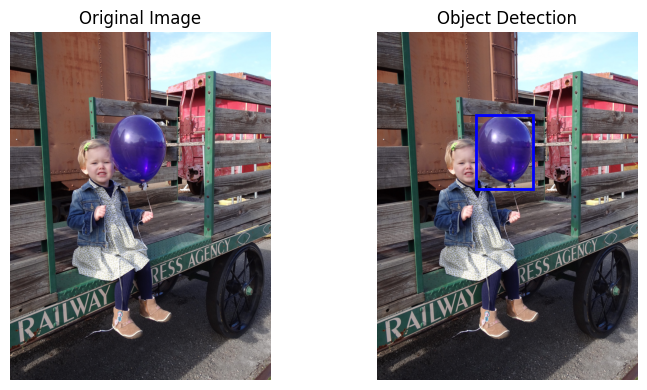

In [30]:
plot_bbox(train_img[2])

## Тренировка модели

Перед началом тренировки будет полезно посмотреть как  предобученная модель ведет себя на целевом наборе данных. Ниже показан пример реализации этой операции для модели `YOLOv8n` и валидационной части данных.


0: 640x640 16 persons, 2 bottles, 2 wine glasss, 2 cups, 1 chair, 1 dining table, 153.5ms
1: 640x640 1 person, 153.5ms
2: 640x640 1 sports ball, 153.5ms
3: 640x640 2 wine glasss, 2 chairs, 1 dining table, 153.5ms
4: 640x640 1 person, 1 frisbee, 153.5ms
5: 640x640 8 persons, 7 cars, 2 trucks, 153.5ms
6: 640x640 5 persons, 1 motorcycle, 1 backpack, 153.5ms
7: 640x640 1 person, 2 sports balls, 1 kite, 153.5ms
8: 640x640 1 person, 1 frisbee, 153.5ms
9: 640x640 2 persons, 1 frisbee, 1 surfboard, 153.5ms
Speed: 4.4ms preprocess, 153.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


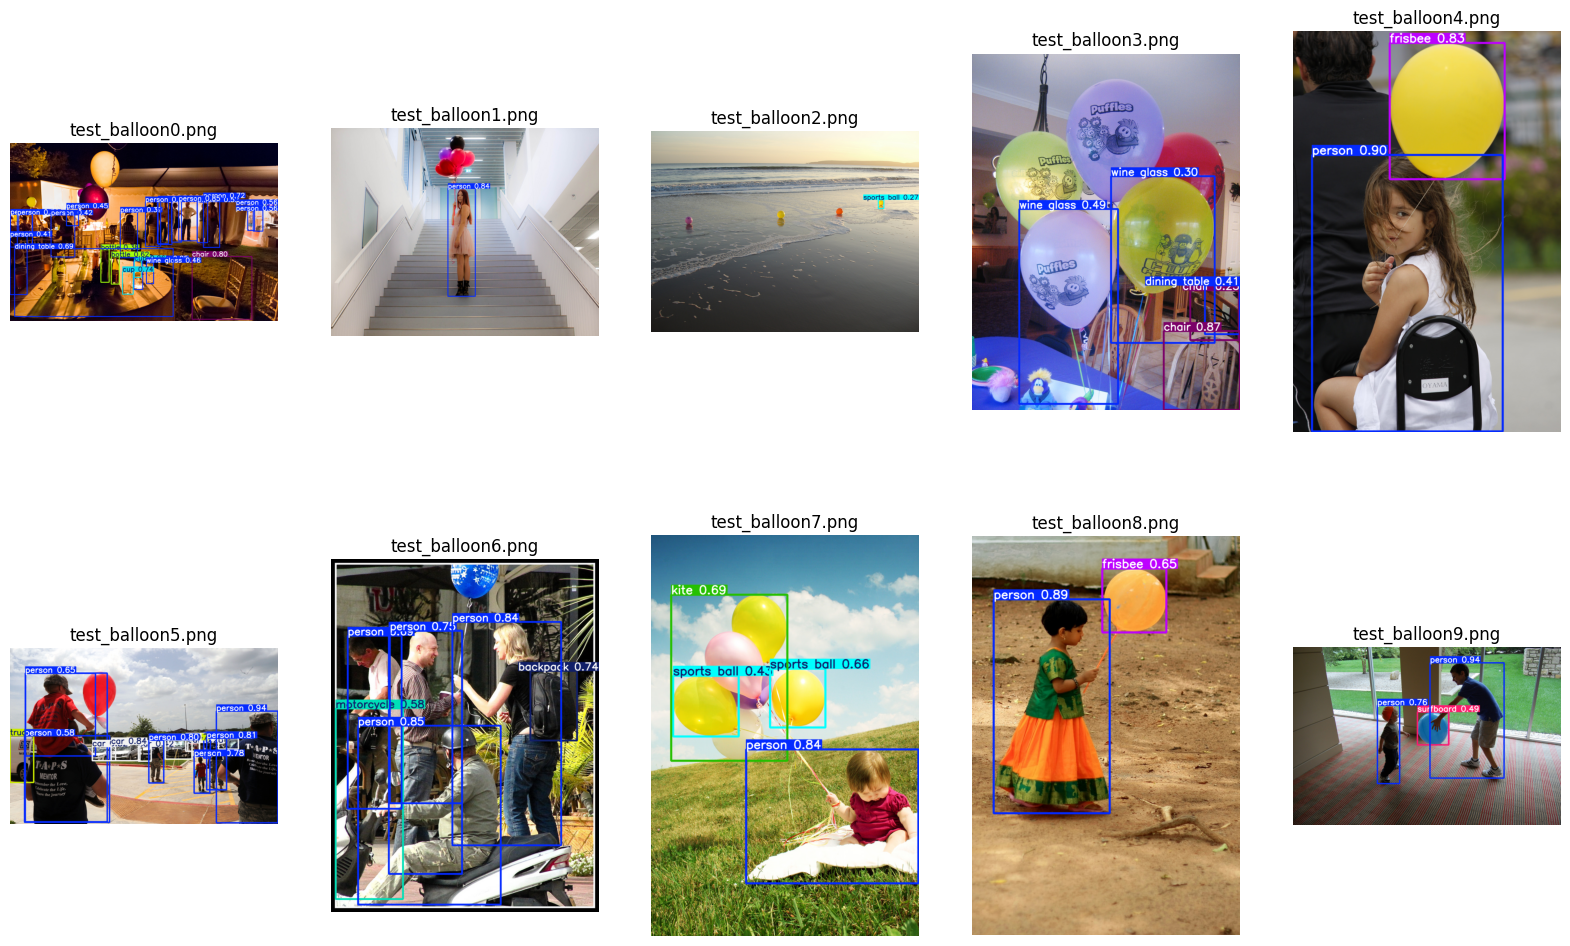

In [49]:
model = YOLO("yolov8n.pt")

results = model(val_img[2:12])

def plt_predicts(results, n_cols = 2, figsize=(20,12)):

    filenames=["test_balloon"+ str(i) +'.png' for i in range(len(results))]

    [res.save(filename=fname ) for  res, fname in zip(results,filenames)]

    fig, axs = plt.subplots(n_cols,len(results)//n_cols, figsize=figsize)
    for fname,ax in zip(filenames,axs.ravel()):
        ax.imshow(cv2.imread(fname)[:,:,::-1]); ax.set_axis_off(); ax.set_title(fname);
    plt.show()
    
plt_predicts(results)

Как и ожидалось, архитекутра, предобученная на наборе данных `COCO` прекрасно справилась с выделением классов, схожих с теми, что представлены в наборе данных `COCO`. При этом интересно, что модель распознает воздушные шары (уж если и распознает) как некоторые классы из исходонго набора данных. Этот факт дает надежду полагать, что модель можно сравнительно легко переобучить под целевую задачу.

Перед началом тренировки модели __создадим файл__ с описанием набора данных `*.yaml`, путь к этому файлу необходимо будет указать в качестве аругмента при тренировке модели. В этом файле будут описаны названия классов (`names`), их число (`nc`), а также пути к тренировочному, валидационному и тестовому наборам данных. Однако, в нашем случае мы не будем указывать последний за неимением.

<!-- Также ометим, что описание набора данных может быть более широким. Примеры файлов `*.yaml` для базовых наборов данных можно найти в директории `../yolov5/data/`. -->
 <!-- А также в директории `scripts` можно найти примеры скриптов для скачивания файлов. -->

In [55]:
import os
os.listdir(dataset_directory )


['train.cache', 'data.yaml', 'train', 'val.cache', 'val']

In [56]:
data_yaml = os.path.join(dataset_directory,'data.yaml')

string = f'''names:
- '0'
nc: 1
train: {train_dir}
val: {val_dir}
'''

with open(data_yaml,'w') as f:
  f.writelines(string)
  f.close()

Считаем файл, чтобы проверить, что он создан верно.

In [57]:
data_yaml
h = open(data_yaml, "r")
for line in h:
    print(line)
h.close()

names:

- '0'

nc: 1

train: /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/balloon/train

val: /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/balloon/val



Созданного описания набора данных проведем обучение модели так, как это показано ниже.

Отметим, возможность задания следующих аргументов тренировки.

```python
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        imgsz (int): Input image size.
        device (str): Device to run training on (e.g., 'cuda', 'cpu').
        workers (int): Number of worker threads for data loading.
        optimizer (str): Optimizer to use for training.
        lr0 (float): Initial learning rate.
        patience (int): Epochs to wait for no observable improvement for early stopping of training.
```

и другие.

In [ ]:
model = YOLO("yolov8n.pt")
results = model.train(data=data_yaml,imgsz=640, epochs=30, amp=False)

New https://pypi.org/project/ultralytics/8.3.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.63 🚀 Python-3.12.2 torch-2.2.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики очные/Короткий CV COurse/data/balloon/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train40, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=

train: Scanning /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практи

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /Users/mvronkin/Yandex.Disk.localized/Компьютерное зрение/практики

Plotting labels to /Users/mvronkin/runs/detect/train40/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/mvronkin/runs/detect/train40
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G     0.6659       3.12      1.062         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         13         50    0.00923       0.72      0.162      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G     0.6507      2.882      1.059        120        640:  

In [ ]:
plt_predicts(model(val_img[2:12]))

Теперь часть шаров находятся. Как и следовало бы ожидать проблемы имееются с небольшими объектами. Однако, можно заметить, что число найденных объектов (без их классов) ниже, чем для предобученной сети.

Важно отметить возможность настройки параметров инференса, в том числе порога обнаружения и минимального IoU для `None-Maximum-Supression` (минимального значения пересечения объектов к их общей площади, при которых считется, что это один объект).

In [ ]:
plt_predicts(model(val_img[2:12],))

## Задания

__1.__ В примерах выше использовалась предобученная модель. В качестве упражнения предлагается проверить точность на модели без предобучения.

__2.__ В данном примере была рассмотренна только модель `YOLO8n` в стандартной конфигурации обучения. Проверьте точность работы модель для других моделйе семейства или изменив конфигурацию обучения.

<code style='color:red'>__3.*__</code> Провидите сравнение семейства моделей YOLO8 c другими моделями [`ultralytics`](https://docs.ultralytics.com/models/), например [`YOLOv9`](https://wandb.ai/byyoung3/ML_NEWS/reports/YOLOv9-object-detection-tutorial---Vmlldzo4Njc2Njc4?galleryTag=computer-vision)

<code style='color:red'>__4.*__</code>  Модели `YOLO` могут работать в нескольких режима, в том числе в реижме классификации. Ранее в примерах разбирался набор данных `CIFAR-10`. Этот набор [входит в стандартные](https://docs.ultralytics.com/datasets/) и для `YOLO`. __Предлагается__ обучить модель `YOLO` для проблемы классификации `CIFAR-10` и сравнить результаты с получаемыми ранее для арихтектур калссиификации. 

<code style='color:red'>__5.*__</code>  Попытайтесь решить проблему [`bannana detection`](https://d2l.ai/chapter_computer-vision/object-detection-dataset.html) из книги [d2l](http://d2l-data.s3-accelerate.amazonaws.com/banana-detection.zip) при помощи `YOLO8`. В данном случае разметка имеет формат  `csv` со столбцами `image, label, xmin, ymin, xmax, ymax` в абсолютных значениях. 

<code style='color:red'>__6.*__</code> Поытайтесь решить проблему `instance segmentation` при помощи `YOLO` для набора данных [`Penn Fudan Ped`](https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip) из официального урока [`PyTorch`] (https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) по многоэтапным архитектурам `Object Detection`.

> См. Также примеры [kaggle](https://www.kaggle.com/datasets/psvishnu/pennfudan-database-for-pedestrian-detection-zip/code).